In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from itertools import product
import datetime
import matplotlib.pyplot as plt
import collections as cc
import seaborn as sns
from collections import Counter
import re
from bs4 import BeautifulSoup
from konlpy.tag import Okt


data1_dir = "../data1.csv"
data2_dir = "../data2.csv"
data3_dir = "../data3.csv"
data4_dir = "../data4.csv"
### 전처리 완료 후 에어포스에 대해서 처리한 데이터 -> processed_data
data_dir='Airfocre_tot.csv'
score_dir='scored_sum_image_normalized.csv'


In [17]:
data1=pd.read_csv(data1_dir,encoding='cp949')
data2=pd.read_csv(data2_dir,encoding='cp949')
data3=pd.read_csv(data3_dir,encoding='cp949')
data4=pd.read_csv(data4_dir,encoding='cp949')
data=pd.read_csv(data_dir,encoding='cp949')
score=pd.read_csv(score_dir,encoding='utf-8')

C:\Users\sunwoong\AppData\Local\Temp\ipykernel_34092\3700683048.py:1: DtypeWarning: Columns (22,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv(data1_dir,encoding='cp949')


In [18]:
#업자가 올린 동일한 설명글의 경우 제거
data = data[~data.duplicated(subset=['description'], keep=False)]


In [19]:
lower_bound = data['price'].quantile(0.10)
upper_bound = data['price'].quantile(0.90)
df_cleaned = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [20]:
df_cleaned['setl_done_date'] = pd.to_datetime(df_cleaned['setl_done_date'], errors='coerce')
df_cleaned['purchase_confirm_date'] = pd.to_datetime(df_cleaned['purchase_confirm_date'], errors='coerce')

# Create a new column 'final_purchase' based on the logic provided
df_cleaned['final_purchase_date'] = df_cleaned[['setl_done_date', 'purchase_confirm_date']].min(axis=1)
#판매 관련 지표까지 걸린 시간 계산 purchase duration : 걸린 총 시간, talk duration: 걸린 요일
df_cleaned['create_date'] = pd.to_datetime(df_cleaned['create_date'], errors='coerce')
df_cleaned['first_talk_date'] = pd.to_datetime(df_cleaned['first_talk_date'], errors='coerce')
df_cleaned['purchase_duration'] = (df_cleaned['final_purchase_date'] - df_cleaned['create_date']).dt.total_seconds() / 3600
#df_cleaned['purchase_duration'] = (df_cleaned['final_purchase_date'] - df_cleaned['create_date']).dt.days
df_cleaned['talk_duration'] = (df_cleaned['first_talk_date'] - df_cleaned['create_date']).dt.days


C:\Users\sunwoong\AppData\Local\Temp\ipykernel_34092\3000719066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['setl_done_date'] = pd.to_datetime(df_cleaned['setl_done_date'], errors='coerce')
C:\Users\sunwoong\AppData\Local\Temp\ipykernel_34092\3000719066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['purchase_confirm_date'] = pd.to_datetime(df_cleaned['purchase_confirm_date'], errors='coerce')
C:\Users\sunwoong\AppData\Local\Temp\ipykernel_34092\3000719066.py:5: SettingWit

In [21]:
df_cleaned['des_length'] = df_cleaned['description'].apply(len)

C:\Users\sunwoong\AppData\Local\Temp\ipykernel_34092\449737945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['des_length'] = df_cleaned['description'].apply(len)


In [22]:
# 평균
mean_des_length = df_cleaned['des_length'].mean()
print(f'Average Description Length: {mean_des_length}')

# 분산
variance_des_length = df_cleaned['des_length'].var()
print(f'Variance of Description Length: {variance_des_length}')

Average Description Length: 87.78169014084507
Variance of Description Length: 6925.760513435221


In [23]:
# 'des_length' 컬럼의 상위 95%, 하위 5% 퍼센타일 값 계산
lower_bound = df_cleaned['des_length'].quantile(0.05)
upper_bound = df_cleaned['des_length'].quantile(0.95)

# 상위 95%, 하위 5% 퍼센타일 범위 내의 값 필터링
df_cleaned = df_cleaned[(df_cleaned['des_length'] >= lower_bound) & (df_cleaned['des_length'] <= upper_bound)]

In [26]:
# 가장 긴 글의 길이
max_des_length = df_cleaned['des_length'].max()

# 가장 긴 글
longest_description = df_cleaned[df_cleaned['des_length'] == max_des_length]['description'].iloc[0]
print(longest_description)

280  사이즈 별 착용감 없습니다


In [25]:
# 평균
mean_des_length = df_cleaned['des_length'].mean()
print(f'Average Description Length: {mean_des_length}')

# 분산
variance_des_length = df_cleaned['des_length'].var()
print(f'Variance of Description Length: {variance_des_length}')

Average Description Length: 76.76377952755905
Variance of Description Length: 2332.6739157605302


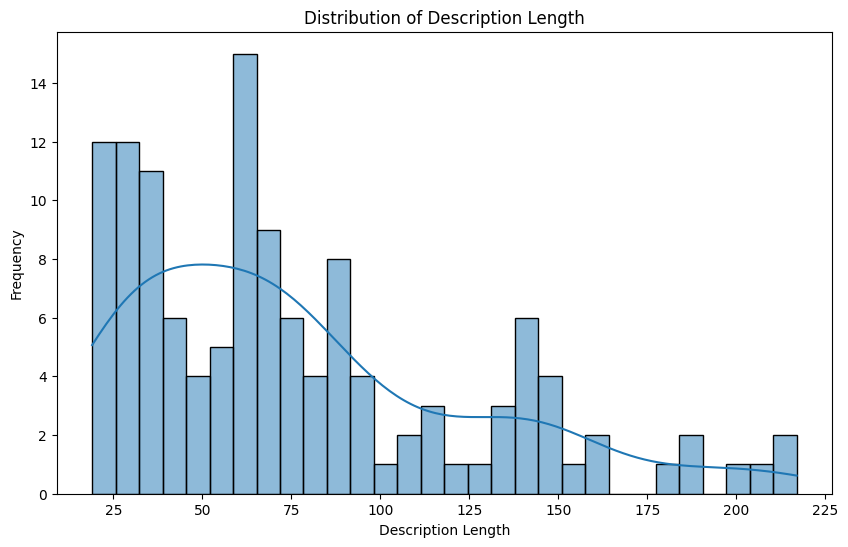

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['des_length'], bins=30, kde=True)
plt.title('Distribution of Description Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()


In [29]:
df_cleaned

,id,status,create_date,name,keyword,price,flag_used,flag_taekpo,flag_exchg,qty,...,purchase_confirm_date,total_price,talk_user_count,first_talk_date,sell_count,register_prod_count,final_purchase_date,purchase_duration,talk_duration,des_length
1,0bc912bd886998ebc4c0c5ba6b362700,3,2024-04-05 13:57:00,나이키 에어포스,"나이키,에어포스,275",75000,20,1,0,0,...,2024-04-18 14:07:00,87620.0,2.0,2024-04-05,1,1,2024-04-05 16:53:00,2.933333,-1,59
3,ac78a060c12396c566e9eb7de105243c,3,2024-01-22 16:52:00,나이키 에어포스1 올백 275 팝니다,NaN,60000,21,1,0,0,...,2024-01-31 17:10:00,60000.0,1.0,2024-01-22,3,1,2024-01-31 17:10:00,216.300000,-1,62
4,61b88b1a528f28b4032310703a2b1dc7,3,2024-02-14 15:34:00,나이키 에어포스 1 올백 240,"나이키,에어포스,에어포스1,나이키포스",69000,21,0,0,0,...,2024-03-05 19:51:00,69000.0,5.0,2024-02-15,2,1,2024-03-05 19:51:00,484.283333,0,32
5,9e39d945f0fcc4ec11dce688e2d4b28f,3,2024-03-24 21:01:00,나이키 에어포스1 올백 올흰 240,NaN,35000,21,0,0,0,...,2024-04-06 18:51:00,36800.0,1.0,2024-03-26,4,1,2024-04-06 18:51:00,309.833333,1,138
6,c6be71e80bd2b2d9cee48eedc2658c64,3,2023-12-11 12:11:00,250]나이키 에어포스 1 07 화이트,"나이키에어포스1,에어포스250",70000,21,0,0,0,...,2024-03-27 09:48:00,73000.0,5.0,2024-01-18,855,1,2024-03-25 11:18:00,2519.116667,37,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1d4265d3b20a3ea825a2940f56460810,3,2024-04-28 22:58:00,나이키 에어포스1 220,NaN,80000,20,1,0,0,...,2024-05-08 22:12:00,82800.0,1.0,2024-05-04,22,1,2024-05-04 12:28:00,133.500000,5,125
194,24a612a7fd794fbe355837467dbc623c,3,2023-12-17 11:55:00,나이키 에어포스 1 07 로우 275,NaN,70000,21,0,0,0,...,2023-12-23 14:08:00,74000.0,2.0,2023-12-18,2,1,2023-12-23 14:08:00,146.216667,0,200
196,01b7f8442fd16cea51124d129762545c,3,2024-04-17 11:24:00,에어포스1 올백 280,"나이키에어포스,나이키에어포스1,에어포스280,에어포스1",70000,21,0,0,0,...,2024-04-29 17:51:00,73000.0,2.0,2024-04-21,2,1,2024-04-29 17:51:00,294.450000,3,49
198,801a94f2ac6be402d6b81cbb574aea81,3,2024-04-20 14:55:00,나이키 에어포스1 로우 올백 화이트 275,NaN,50000,21,0,0,0,...,2024-05-01 14:51:00,54100.0,7.0,2024-04-20,45,1,2024-05-01 14:51:00,263.933333,-1,39


In [30]:
score_dir='scored_sum_image_normalized.csv'
score=pd.read_csv(score_dir,encoding='utf-8')

In [32]:
score=score[['pid','sum_score']]

In [33]:
merged_df = pd.merge(df_cleaned, score, left_on='id', right_on='pid', how='left')


In [34]:
merged_df

,id,status,create_date,name,keyword,price,flag_used,flag_taekpo,flag_exchg,qty,...,talk_user_count,first_talk_date,sell_count,register_prod_count,final_purchase_date,purchase_duration,talk_duration,des_length,pid,sum_score
0,0bc912bd886998ebc4c0c5ba6b362700,3,2024-04-05 13:57:00,나이키 에어포스,"나이키,에어포스,275",75000,20,1,0,0,...,2.0,2024-04-05,1,1,2024-04-05 16:53:00,2.933333,-1,59,0bc912bd886998ebc4c0c5ba6b362700,5.206606
1,ac78a060c12396c566e9eb7de105243c,3,2024-01-22 16:52:00,나이키 에어포스1 올백 275 팝니다,NaN,60000,21,1,0,0,...,1.0,2024-01-22,3,1,2024-01-31 17:10:00,216.300000,-1,62,ac78a060c12396c566e9eb7de105243c,9.941372
2,61b88b1a528f28b4032310703a2b1dc7,3,2024-02-14 15:34:00,나이키 에어포스 1 올백 240,"나이키,에어포스,에어포스1,나이키포스",69000,21,0,0,0,...,5.0,2024-02-15,2,1,2024-03-05 19:51:00,484.283333,0,32,61b88b1a528f28b4032310703a2b1dc7,-11.412334
3,9e39d945f0fcc4ec11dce688e2d4b28f,3,2024-03-24 21:01:00,나이키 에어포스1 올백 올흰 240,NaN,35000,21,0,0,0,...,1.0,2024-03-26,4,1,2024-04-06 18:51:00,309.833333,1,138,9e39d945f0fcc4ec11dce688e2d4b28f,-16.264341
4,c6be71e80bd2b2d9cee48eedc2658c64,3,2023-12-11 12:11:00,250]나이키 에어포스 1 07 화이트,"나이키에어포스1,에어포스250",70000,21,0,0,0,...,5.0,2024-01-18,855,1,2024-03-25 11:18:00,2519.116667,37,187,c6be71e80bd2b2d9cee48eedc2658c64,-1.524808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1d4265d3b20a3ea825a2940f56460810,3,2024-04-28 22:58:00,나이키 에어포스1 220,NaN,80000,20,1,0,0,...,1.0,2024-05-04,22,1,2024-05-04 12:28:00,133.500000,5,125,1d4265d3b20a3ea825a2940f56460810,6.196063
123,24a612a7fd794fbe355837467dbc623c,3,2023-12-17 11:55:00,나이키 에어포스 1 07 로우 275,NaN,70000,21,0,0,0,...,2.0,2023-12-18,2,1,2023-12-23 14:08:00,146.216667,0,200,24a612a7fd794fbe355837467dbc623c,1.627951
124,01b7f8442fd16cea51124d129762545c,3,2024-04-17 11:24:00,에어포스1 올백 280,"나이키에어포스,나이키에어포스1,에어포스280,에어포스1",70000,21,0,0,0,...,2.0,2024-04-21,2,1,2024-04-29 17:51:00,294.450000,3,49,01b7f8442fd16cea51124d129762545c,9.237624
125,801a94f2ac6be402d6b81cbb574aea81,3,2024-04-20 14:55:00,나이키 에어포스1 로우 올백 화이트 275,NaN,50000,21,0,0,0,...,7.0,2024-04-20,45,1,2024-05-01 14:51:00,263.933333,-1,39,801a94f2ac6be402d6b81cbb574aea81,-13.804903


In [35]:
result_df = merged_df.drop(columns=['pid'])


In [36]:
result_df.to_csv("Airforce_with_score.csv",index=False,encoding='cp949')

In [40]:
result_df

,id,status,create_date,name,keyword,price,flag_used,flag_taekpo,flag_exchg,qty,...,total_price,talk_user_count,first_talk_date,sell_count,register_prod_count,final_purchase_date,purchase_duration,talk_duration,des_length,sum_score
0,0bc912bd886998ebc4c0c5ba6b362700,3,2024-04-05 13:57:00,나이키 에어포스,"나이키,에어포스,275",75000,20,1,0,0,...,87620.0,2.0,2024-04-05,1,1,2024-04-05 16:53:00,2.933333,-1,59,5.206606
1,ac78a060c12396c566e9eb7de105243c,3,2024-01-22 16:52:00,나이키 에어포스1 올백 275 팝니다,NaN,60000,21,1,0,0,...,60000.0,1.0,2024-01-22,3,1,2024-01-31 17:10:00,216.300000,-1,62,9.941372
2,61b88b1a528f28b4032310703a2b1dc7,3,2024-02-14 15:34:00,나이키 에어포스 1 올백 240,"나이키,에어포스,에어포스1,나이키포스",69000,21,0,0,0,...,69000.0,5.0,2024-02-15,2,1,2024-03-05 19:51:00,484.283333,0,32,-11.412334
3,9e39d945f0fcc4ec11dce688e2d4b28f,3,2024-03-24 21:01:00,나이키 에어포스1 올백 올흰 240,NaN,35000,21,0,0,0,...,36800.0,1.0,2024-03-26,4,1,2024-04-06 18:51:00,309.833333,1,138,-16.264341
4,c6be71e80bd2b2d9cee48eedc2658c64,3,2023-12-11 12:11:00,250]나이키 에어포스 1 07 화이트,"나이키에어포스1,에어포스250",70000,21,0,0,0,...,73000.0,5.0,2024-01-18,855,1,2024-03-25 11:18:00,2519.116667,37,187,-1.524808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1d4265d3b20a3ea825a2940f56460810,3,2024-04-28 22:58:00,나이키 에어포스1 220,NaN,80000,20,1,0,0,...,82800.0,1.0,2024-05-04,22,1,2024-05-04 12:28:00,133.500000,5,125,6.196063
123,24a612a7fd794fbe355837467dbc623c,3,2023-12-17 11:55:00,나이키 에어포스 1 07 로우 275,NaN,70000,21,0,0,0,...,74000.0,2.0,2023-12-18,2,1,2023-12-23 14:08:00,146.216667,0,200,1.627951
124,01b7f8442fd16cea51124d129762545c,3,2024-04-17 11:24:00,에어포스1 올백 280,"나이키에어포스,나이키에어포스1,에어포스280,에어포스1",70000,21,0,0,0,...,73000.0,2.0,2024-04-21,2,1,2024-04-29 17:51:00,294.450000,3,49,9.237624
125,801a94f2ac6be402d6b81cbb574aea81,3,2024-04-20 14:55:00,나이키 에어포스1 로우 올백 화이트 275,NaN,50000,21,0,0,0,...,54100.0,7.0,2024-04-20,45,1,2024-05-01 14:51:00,263.933333,-1,39,-13.804903


In [38]:
# purchase_duration 다른 변수 간의 상관관계 계산
correlation_matrix = result_df.corr(numeric_only=True)

# purchase_duration 다른 변수 간의 상관관계 추출
view_before_purchase_corr = correlation_matrix['purchase_duration'].sort_values(ascending=False)


In [39]:
view_before_purchase_corr

purchase_duration      1.000000
talk_duration          0.748192
talk_user_count        0.399126
sell_count             0.186497
price                  0.140872
total_price            0.137582
des_length             0.112542
is_active              0.099352
buyer_birth_year       0.069778
seller_birth_year      0.058559
image_count            0.040145
status                 0.026309
qty                    0.006742
flag_used              0.000435
category              -0.016950
category_id           -0.016950
sum_score             -0.086514
register_prod_count   -0.162969
flag_taekpo           -0.210060
flag_exchg                  NaN
is_enable                   NaN
Name: purchase_duration, dtype: float64